# Sandtander Customer transaction Prediction
The structure of the book is as follows:

--> First we will import all the packages

-->We will inspect the data, and we will see that all the features are numeric

--> Scaling the data

--> We will see that the target class is unbalanced, we will use one of the over sampling method to balance the classes 50 - 50 %

--> Finally, we will build a machine learning model to prdict if the cusrtomer will make a transcation or not

In [2]:
#hiding all warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
#importing all the packages
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [3]:
# read the csv file 
df = pd.read_csv('train.csv')

# Inspecting the data

In [4]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


As we can see that the few of the features the values are all positive  and few features contain both positive and negative values, we will later(preprocessing stage) scale them to a uniform range. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
df.shape

(200000, 202)

In [8]:
#to check the missing data 
df.isnull().values.sum()

0

No null value present, no imputation

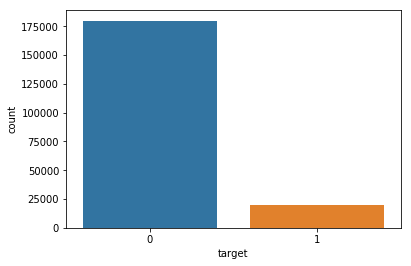

In [9]:
sns.countplot(df['target'])

In [19]:
df.groupby('target').count()['ID_code']

target
0    179902
1     20098
Name: ID_code, dtype: int64

We can see that the data is unbalanced with 90-10 ratio. Data should be blanced in order to train any machine learning alogrithm, we will do it in the next step

# Pre processing the data


In [20]:
# the data is unbalanced , we have to balance the data before 
#proceeding
# but first lets rescale the data

In [21]:
# train and test data
X = df.drop(['ID_code' , 'target'], axis = 1)
y = df['target']

In [22]:
# scale the data in uniform range
scale = StandardScaler()
scale.fit(X)
scaled_x = scale.transform(X)
scaled_x_df = pd.DataFrame(scaled_x , columns = X.columns , index = X.index)


In [23]:
# divide the dta in train n test(validation) test
X_train, X_test, y_train, y_test = train_test_split(scaled_x_df,y,test_size = 0.3, random_state = 42)


In [24]:
#y_train.shape

(140000,)

# Oversampling using SMOTE

In [26]:
#We will balance the dataset in this step 
#SMOTE is oversampling of the minority class, i
#mported from imbalanced learning library
sm = SMOTE(random_state = 42 , ratio = 1.0)
X_train_res , y_train_res  = sm.fit_sample(X_train, y_train)

In [27]:
len(y_train_res)

252092

In [28]:
#Initiate Logistic Regression classifier with default parameters
logreg = LogisticRegression()

In [29]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
from sklearn.model_selection import GridSearchCV
import numpy as np

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

logreg_cv = GridSearchCV(logreg , param_grid , cv = 5)

#logreg_cv.fit(X_train_res , y_train_res)

In [35]:
#fitting the model
logreg_cv.fit(X_train_res , y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.006105402296585327, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.799906383383844


In [ ]:
#logreg.fit(X_train_res, y_train_res)

#y_pred = logreg.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

y_pred = logreg_cv.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[42509 11347]
 [ 1430  4714]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     53856
           1       0.29      0.77      0.42      6144

   micro avg       0.79      0.79      0.79     60000
   macro avg       0.63      0.78      0.65     60000
weighted avg       0.90      0.79      0.82     60000



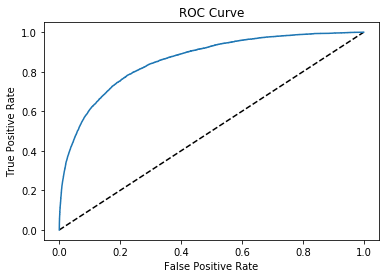

In [40]:
from sklearn.metrics import roc_curve , roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [41]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8591639215957058
